In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import re
# import matplotlib.patches as patches
from matplotlib.path import Path

In [5]:
directory = '../influx_random_sims_3D/N_realisation_3/'

with open(os.path.join(directory, 'collision_series.pkl'), 'rb') as f:
    collision_series = pickle.load(f) 

# with open(os.path.join(directory, 'masters_slaves_series.pkl'), 'rb') as f:
#     masters_slaves_series = pickle.load(f)


files = sorted([file for file in os.listdir(directory) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))

# directory_b = '../influx_random_sims_contInjection/N_realisation_2/'

# with open(os.path.join(directory_b, 'collision_series.pkl'), 'rb') as f:
#     collision_series_b = pickle.load(f)

# with open(os.path.join(directory_b, 'masters_slaves_series.pkl'), 'rb') as f:
#     masters_slaves_series_b = pickle.load(f)

# files_b = sorted([file for file in os.listdir(directory_b) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))

load geometry data

In [6]:
path = '../velocity_results/alpha04_2D_geometry.npy'
geometry = np.load(path)
x_core, y_core, y_lower_core, x_ring, y_ring = geometry.T

In [10]:
R0 = 1
dt = 0.05
K = 1e7

perc = []
numbers = []
volumes = []
volume_perc = []
max_st = []
vol_density = []
possible_st = []

for f, file in enumerate(files):
    data = np.load(os.path.join(directory, file))
    all_points = np.vstack([data[:, 1], data[:, 2]]).T

    upper_core = Path(np.vstack([x_core, y_core]).T).contains_points(all_points)
    upper_points = all_points[upper_core]
    lower_core = Path(np.vstack([x_core, y_lower_core]).T).contains_points(all_points)
    lower_points = all_points[lower_core]

    inside = np.vstack([upper_core, lower_core]).any(axis=0)
    inside_stokes = data[inside, -1]
    inside_volume = np.sum(inside_stokes ** 1.5)
    perc.append(np.sum(inside) / len(inside))
    numbers.append(np.sum(inside))
    volumes.append(inside_volume)
    volume_perc.append(inside_volume / np.sum(data[:, -1] ** 1.5))
    max_st.append(np.max(inside_stokes) if len(inside_stokes) > 0 else None)
    vol_density.append(np.sum((inside_stokes / K) ** 1.5) / (R0**3))

    # clear_output(wait=True)
    # ax.hist(inside_stokes, bins=10, alpha=0.5, label=f)
    # plt.scatter(data[:,1][inside], data[2][inside], 'o', markersize=1, label=f)

perc_b = []
numbers_b = []
volumes_b = []
volume_perc_b = []
max_st_b = []
vol_density_b = []
possible_st_b = []

# for f, file in enumerate(files_b):
#     data = np.load(os.path.join(directory_b, file))
#     all_points = np.vstack([data[:, 1], data[:, 2]]).T

#     upper_core = Path(np.vstack([x_core, y_core]).T).contains_points(all_points)
#     upper_points = all_points[upper_core]
#     lower_core = Path(np.vstack([x_core, y_lower_core]).T).contains_points(all_points)
#     lower_points = all_points[lower_core]

#     inside = np.vstack([upper_core, lower_core]).any(axis=0)
#     inside_stokes = data[inside, -1]
#     inside_volume = np.sum(inside_stokes ** 1.5)
#     perc_b.append(np.sum(inside) / len(inside))
#     numbers_b.append(np.sum(inside))
#     volumes_b.append(inside_volume)
#     volume_perc_b.append(inside_volume / np.sum(data[:, -1] ** 1.5))
#     max_st_b.append(np.max(inside_stokes) if len(inside_stokes) > 0 else None)
#     vol_density_b.append(np.sum((inside_stokes / K) ** 1.5) / (R0**3))







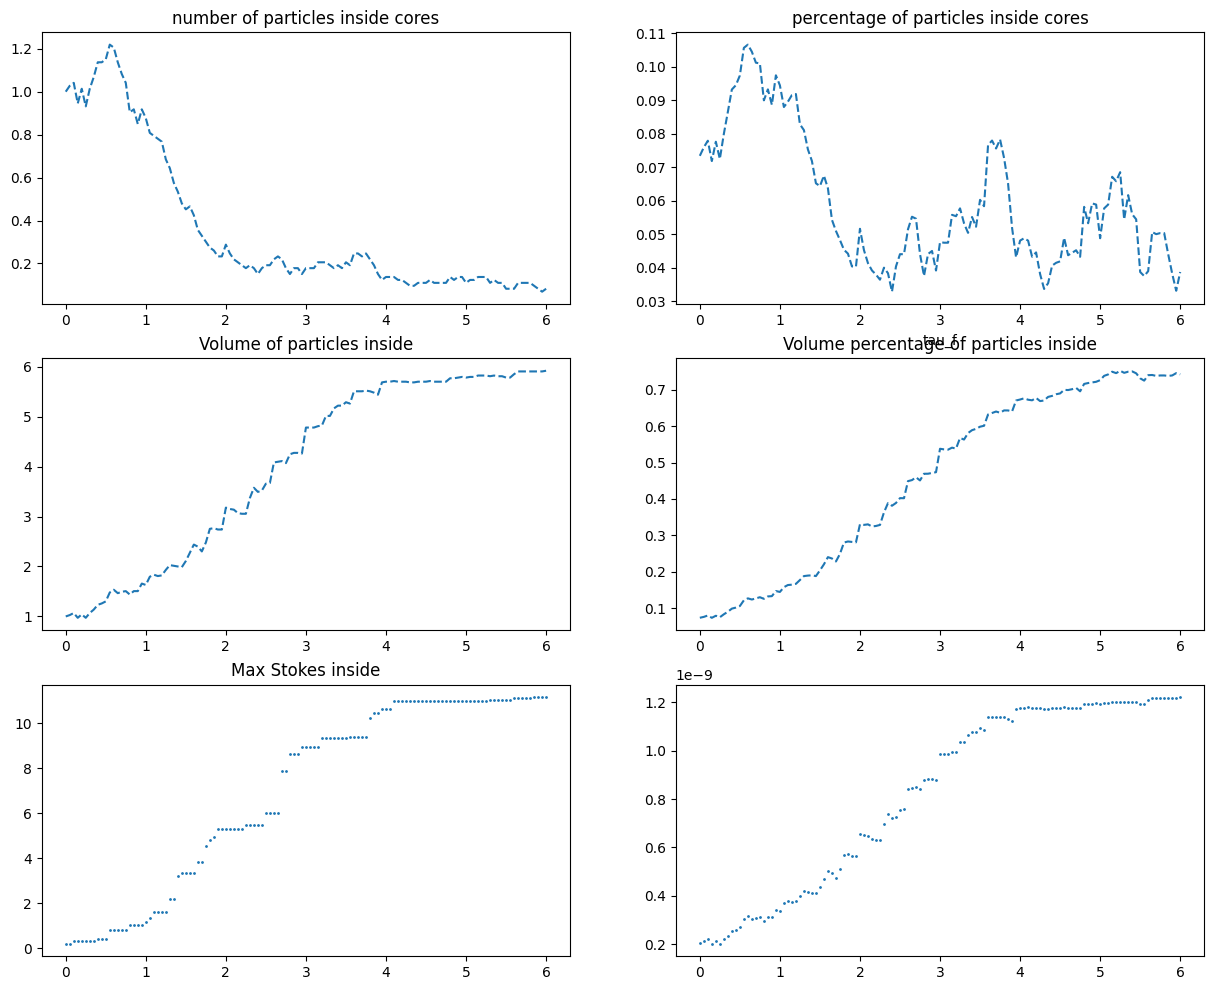

In [12]:

fig, ax = plt.subplots(3, 2, figsize=(15, 12))
ax[0,1].plot(np.arange(len(perc)) * dt, perc, '--', markersize=1, label='no bounce')
# ax[0,1].plot(np.arange(len(perc_b)) * dt, perc_b, '--', markersize=1, label='bounce')
ax[0,1].set_title('percentage of particles inside cores')
ax[0,1].set_xlabel('tau_f')
# ax[0,1].legend()
ax[0,0].plot(np.arange(len(numbers))* dt, numbers/numbers[0], '--', label='0',markersize=1)
# ax[0,0].plot(np.arange(len(numbers_b))* dt, numbers_b/numbers_b[0], '--', label='0',markersize=1)
ax[0,0].set_title('number of particles inside cores')
ax[1,0].plot(np.arange(len(volumes))* dt, volumes/volumes[0], '--', label='0', markersize=1)
# ax[1,0].plot(np.arange(len(volumes_b))* dt, volumes_b/volumes_b[0], '--', label='0', markersize=1)
ax[1,0].set_title('Volume of particles inside')
ax[1,1].plot(np.arange(len(volume_perc))* dt, volume_perc, '--', label='0',markersize=1)
# ax[1,1].plot(np.arange(len(volume_perc_b))* dt, volume_perc_b, '--', label='0',markersize=1)
ax[1,1].set_title('Volume percentage of particles inside')
ax[2,0].plot(np.arange(len(max_st))* dt, max_st, 'o', label='0', markersize=1)
# ax[2,0].plot(np.arange(len(max_st_b))* dt, max_st_b, 'o', label='0', markersize=1)
ax[2,0].set_title('Max Stokes inside')
ax[2,1].plot(np.arange(len(vol_density))* dt, vol_density, 'o', label='0', markersize=1)
# ax[2,1].plot(np.arange(len(vol_density_b))* dt, vol_density_b, 'o', label='0', markersize=1)

plt.show()